# Binary classification problem

### This task aims to fit different classifier models to the given data, evaluate and compare the performance of the models.

The dataset is preprocessed before being used for modeling. The hyperparameters for the models are tuned to an extent to obtain higher accuracy with validation data. Observations are provided at the end of each model fit and descriptions for the code is provided as comments in some places.

In [2208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import warnings

In [2209]:
train_dataset = pd.read_csv("training_data.csv")
valid_dataset = pd.read_csv("validation_data.csv")

In [2210]:
training_data = train_dataset.iloc[:,1:22]
X_train = training_data.iloc[:,0:20]
y_train = training_data.iloc[:,20]

validation_data = valid_dataset.iloc[:,1:22]
X_val = validation_data.iloc[:,0:20]
y_val = validation_data.iloc[:,20]

## Data preprocessing

In [2211]:
def preprocess(X): 

    # Numerical columns with missing values replaced with zeroes (mean)
    X[['x.1','x.2','x.13','x.16','x.18']] = X[['x.1','x.2','x.13','x.16','x.18']].replace({'?':'0','f':'0','t':'0'})
    X[['x.14']] = X[['x.14']].replace(['f','t'],'0')
    
    # Character columns with missing values replaced with 'Missing'
    X[['x.0','x.3','x.4','x.5','x.6','x.15']] = X[['x.0','x.3','x.4','x.5','x.6','x.15']].replace('?','Missing')
    
    # Numerical columns with 'f' values changed to 0 and 't' values changed to 1 #10
    X[['x.7','x.10']] = X[['x.7','x.10']].replace({'f':'0','t':'1'})
    
    X['x.1'] = X['x.1'].str.replace(',', '.')
    X['x.16'] = X['x.16'].str.replace(",","").astype(float)
    X['x.17'] = X['x.17'].str.replace(",","").astype(float)

    
    #Encoding categorical string values to numerical categories
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    encoder = LabelEncoder()
    X.iloc[:,[0,3,4,5,6,8,9,11,12,15]] = X.iloc[:,[0,3,4,5,6,8,9,11,12,15]].apply(encoder.fit_transform)
    

    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X.iloc[:,[1,2,7,13,14,16,17,18]] = scaler.fit_transform(X.iloc[:,[1,2,7,13,14,16,17,18]])

    #Removing the x.19 as it has almost 80% missing values
    #Removing the x.19 as it has ambiguous values containing both string and numerical values
    X = X.drop(X.columns[[10,19]], axis=1)
    

    return X

In [2212]:
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    X_train = preprocess(X_train)
    X_val = preprocess(X_val)

In [2213]:
X_train.shape 

(2671, 18)

In [2214]:
y_train.shape 

(2671,)

In [2215]:
X_val.shape

(490, 18)

In [2216]:
y_val.shape

(490,)

In [2217]:
X_train.head()

,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18
0,2,-0.255916,-1.063556,2,1,13,8,-0.536098,3,1,0,0,0.230827,-0.255340,1,0.257387,-0.535995,0.230827
1,1,1.958818,-0.258437,2,1,11,4,-0.123796,3,1,0,0,-0.729609,-0.188053,1,1.987714,0.762931,-0.729609
2,1,-0.759481,-0.973296,2,1,11,4,-0.478514,3,0,0,0,0.701985,-0.156332,1,-0.138451,0.614900,0.701985
3,2,-0.494573,-0.785555,2,1,13,8,0.039743,3,1,1,0,-0.385302,-0.254980,1,0.053888,-0.865817,-0.385302
4,2,-1.103943,-0.048131,2,1,13,8,-0.430143,3,0,0,2,-0.264492,-0.255340,1,-1.480771,1.140366,-0.264492


In [2218]:
X_val.head()

,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18
0,1,-0.474207,-0.797324,2,1,11,4,-0.153586,3,1,0,0,-1.049030,-0.024793,1,-0.056575,1.340832,-1.049030
1,1,0.910856,-0.901292,2,1,7,1,0.193782,3,0,1,0,-1.049030,-0.101806,1,-1.326861,-0.880069,-1.049030
2,2,-0.413987,-0.329468,2,1,2,8,0.193782,3,1,0,0,-1.049030,-0.040684,0,-0.078834,-0.795261,-1.049030
3,1,-0.741584,1.230051,2,1,11,8,-0.341165,3,1,1,0,-0.769623,-0.162928,1,-0.276574,3.165382,-0.769623
4,2,0.509389,-0.459428,3,3,13,8,-0.558271,3,1,0,0,-0.763920,0.078911,1,0.583426,-0.147892,-0.763920


In [2219]:
# Converting dataframe to numpy arrays
X_train = X_train.values
y_train = y_train.values

In [2220]:
# Splitting dataset into training and test sets
# Test data prepared by taking 25% of training data and using it only for the final evaluation.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

In [2221]:
X_train.shape

(2003, 18)

In [2222]:
X_test.shape

(668, 18)

## Logistic Regression

In [2223]:
# Fitting Logistic Regression to training set

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train,y_train)

### Prediction with validation data

In [2224]:
y_pred = classifier.predict(X_val)

### Evaluating the model performance using confusion matrix:

In [2225]:
# Here we use validation data to evaluate the performance
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_val,y_pred)
conf_mat

array([[ 69, 267],
       [  4, 150]])

In [2226]:
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_pred, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,150,4
true:bad,267,69


### Evaluation with test data

In [2227]:
y_pred_final = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_final)
conf_mat

array([[ 42,  19],
       [ 12, 595]])

In [2228]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_final, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,595,12
true:bad,19,42


In [2229]:
# This function is used to plot the confusion matrix and normalized confusion matrix
import itertools
def visualize_cm(cm):
    """
    Function visualizes a confusion matrix with and without normalization
    """
    plt.rc('legend', fontsize=10) 
    plt.rc('axes', labelsize=10) 
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 


    fig, axes = plt.subplots(1, 2,figsize=(10,5))

    im1 = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    fig.colorbar(im1, ax=axes[0])
    classes = ['bad','good']
    tick_marks = np.arange(len(classes))
    axes[0].set_xticks(tick_marks)
    axes[0].set_xticklabels(classes,rotation=45)
    axes[0].set_yticks(tick_marks)
    axes[0].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[0].text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    axes[0].set_xlabel('predicted label: y_pred_final')
    axes[0].set_ylabel('true label: $y$')
    axes[0].set_title(r'Without normalization')
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im2 = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    fig.colorbar(im2, ax=axes[1])
    
    axes[1].set_xticks(tick_marks)
    axes[1].set_xticklabels(classes,rotation=45)
    axes[1].set_yticks(tick_marks)
    axes[1].set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[1].text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    axes[1].set_xlabel('predicted label: y_pred_final')
    axes[1].set_ylabel('true label: $y$')
    axes[1].set_title(r'Normalized')
    
    axes[0].set_ylim(-0.5,2.5) 
    axes[1].set_ylim(-0.5,2.5)
    
    plt.tight_layout()
    plt.show()


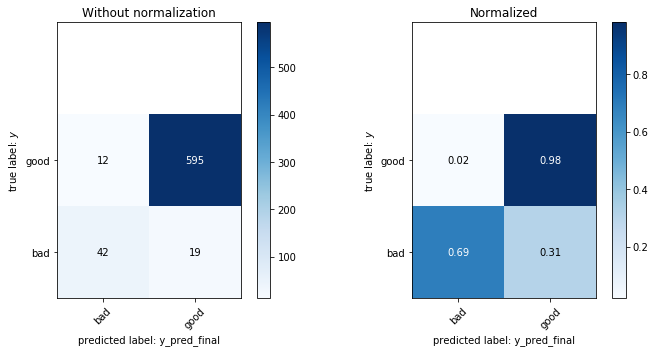

In [2230]:
visualize_cm(conf_mat)

The number of correct classifications = 42 + 595 = 637 <br>
The number of incorrect classifications = 12 + 19 = 31

### Evaluating final model performance using k-fold cross-validation:

In [2231]:
# Applying 10-fold cross-validation

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [2232]:
# average of the cross-validation scores of all folds
accuracies.mean()

0.9445793556967637

In [2233]:
# variance of the cv score
accuracies.std()

0.013511218245746049

Observations for Logistic Regression: 
1. As seen from the above numbers, logistic regression performs well for the given data. <br>
2. The model do not perform great with validation data (with higher training error). However, the model performs well with the test data. <br>
3. This shows there is no over-fitting by the learning algorithm and the model is able to generalize decently well for the unseen data. <br>
4. The mean accuracy obtained from 10-fold cross-validation is  94.46% 

## k-Nearest Neighbors

In [2254]:
# Fitting model to training set

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)

In [2235]:
# Prediction with validation data

y_pred = classifier.predict(X_val)


### Evaluating the model performance using confusion matrix:

In [2236]:
# Using validation data to evaluate the performace
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_val,y_pred)
conf_mat

array([[268,  68],
       [ 12, 142]])

In [2237]:
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_pred, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,142,12
true:bad,68,268


### Evaluation with test data

In [2238]:
# Final prediction with test data

y_pred_final = classifier.predict(X_test)

In [2239]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_final)
conf_mat

array([[ 51,  10],
       [  0, 607]])

In [2240]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_final, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,607,0
true:bad,10,51


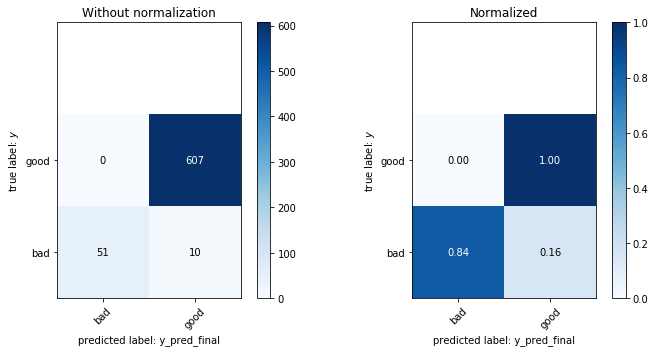

In [2241]:
visualize_cm(conf_mat)

The number of correct classifications = 51 + 607 = 658 <br>
The number of incorrect classifications = 0 + 10 = 10

### Evaluating final model performance using k-fold cross-validation:

In [2242]:
# Applying 10-fold cross-validation

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [2243]:
# average of the cross-validation scores of all folds
accuracies.mean()

0.9725446776020886

Observations for k-Nearest Neighbors Classification: 
1. As seen from the above numbers, k-NN performs better than logistic regression with  even lesser false negatives <br>
2. The training error is low when fitting the model to training data <br>
3. The mean accuracy obtained from 10-fold cross validation is 97.25% 
4. k-NN model predcition has lesser False Negatives. For a case of evaluating credit risk, this model is useful because the risk of a customer being termed as 'bad' when actually he is 'good' is minimum.

## Random Forest Classification

In [2244]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=4,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [2245]:
# Predicition with validation data

y_pred = classifier.predict(X_val)

### Evaluating the model performance using confusion matrix:

In [2246]:
# Using validation data to evaluate the performace
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_val,y_pred)
conf_mat

array([[174, 162],
       [  5, 149]])

In [2247]:
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_pred, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,149,5
true:bad,162,174


### Evaluation with test data

In [2248]:
# Final prediction with test data

y_pred_final = classifier.predict(X_test)

In [2249]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_final)
conf_mat

array([[ 57,   4],
       [  0, 607]])

In [2250]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_final, labels=['good', 'bad']), 
    index=['true:good', 'true:bad'], 
    columns=['pred:good', 'pred:bad'])
cmtx

,pred:good,pred:bad
true:good,607,0
true:bad,4,57


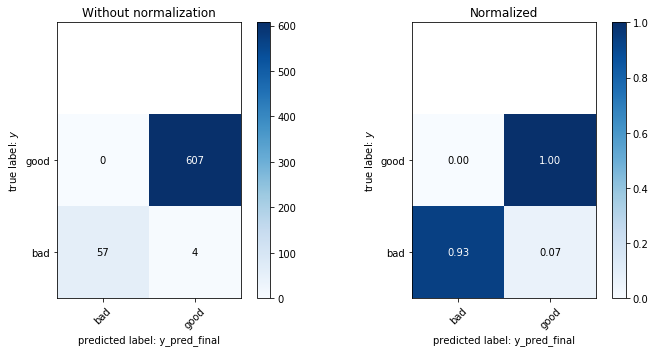

In [2251]:
visualize_cm(conf_mat)

The number of correct classifications = 57 + 607 = 664 <br>
The number of incorrect classifications = 0 + 4 = 4

### Evaluating final model performance using k-fold cross-validation:

In [2252]:
# Applying 10-fold cross-validation

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [2253]:
# average of the cross-validation scores of all folds
accuracies.mean()

0.9920099256194275

Observations for Random Forest Classification: 
1. As seen from the above numbers, random forest classifier performs better than both logistic regression and k-Nearest Neighbors. <br>
2. The training error is not low (as false positives are high) but it does generalize the data well with very less test error and thus, high accuracy. <br>
3. Similar to k-NN, random forest prediction also has less false negatives. 
3. The mean accuracy obtained by random forest is 99.2% <br>